In [1]:
import pandas as pd

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
%config Completer.use_jedi = False

Reading The Dataset as csv file

In [4]:
df=pd.read_csv('trump_insult_tweets_2014_to_2021.csv',index_col=None)

In [5]:
df

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


Droping duplicates rows

In [6]:
dfdup=df[df.duplicated(['tweet'])]

In [7]:
df=df.drop_duplicates(subset=["tweet"],keep="first")

In [8]:
df

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
5,6,2015-06-24,rockin-in-the-free-world,didn't love it,".@Neilyoung’s song, “Rockin’ In The Free World..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


In [9]:

df.target.value_counts()

the-media               637
democrats               359
hillary-clinton         354
joe-biden               210
trump-russia            205
                       ... 
big-game-hunting          1
intelligence-leakers      1
woody-johnson             1
rodrigo-duterte           1
sam-liccardo              1
Name: target, Length: 822, dtype: int64

WordCloud of Trmup's Insults

In [10]:
import matplotlib.pyplot as plt

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

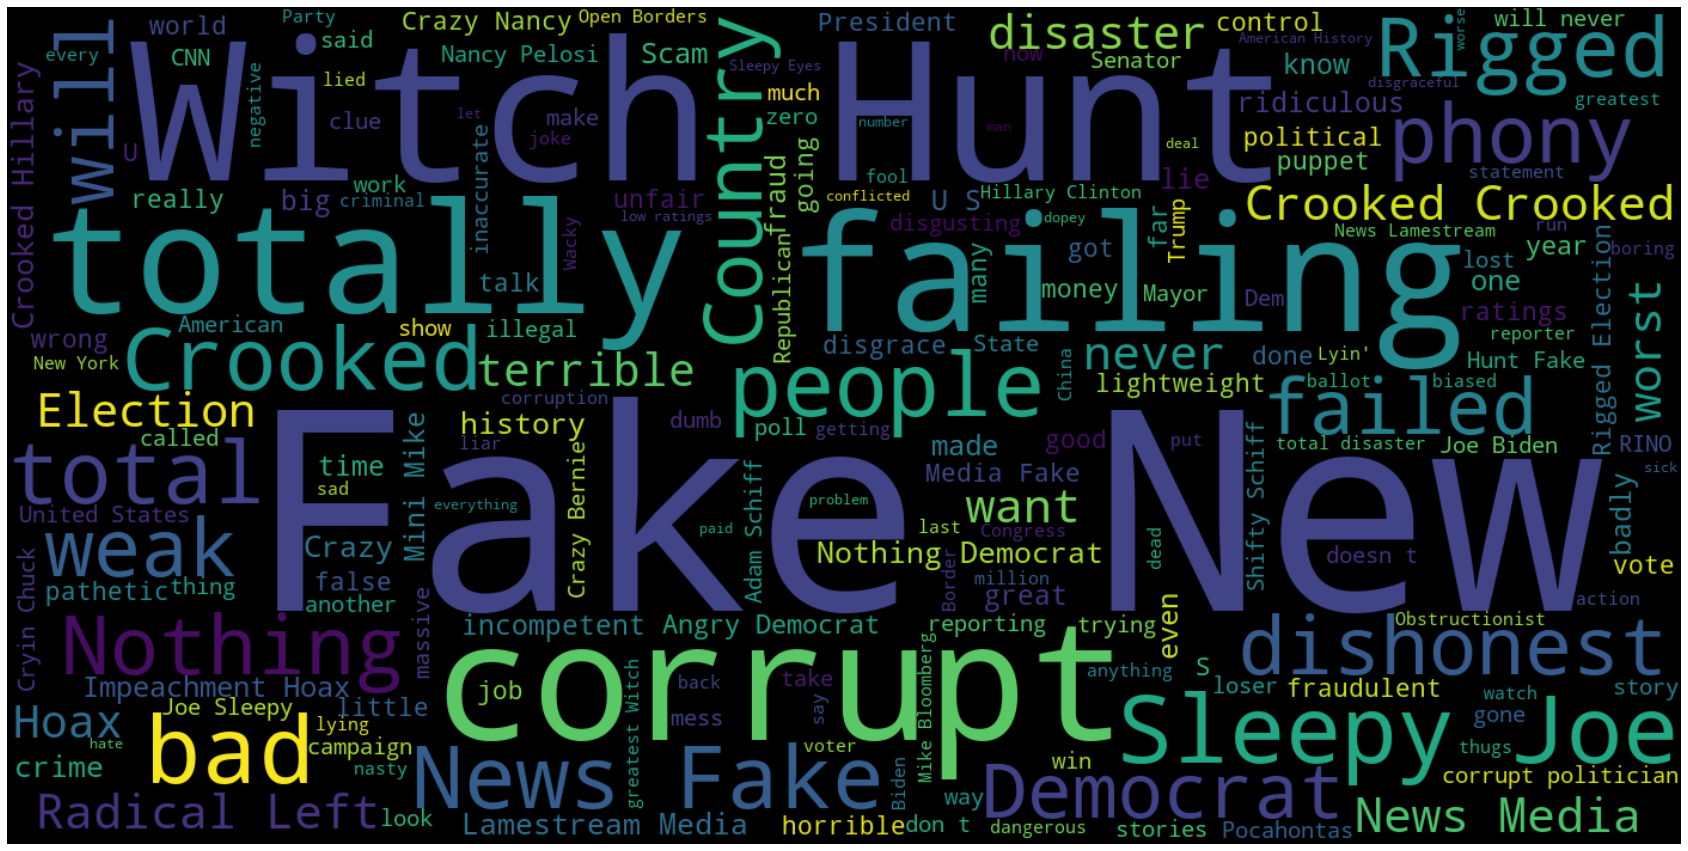

In [12]:
insult_text = " ".join(df.insult)
wordcloud = WordCloud(width=1400, height=700).generate(text=insult_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
tweets=df['tweet'].values

# Preprocessing the data using my own library

In [11]:
import preprocess_vendroid as ven

In [15]:
tw=tweets.copy()

In [16]:
len(tw)

5673

In [17]:
text=[]

In [18]:
for i in tw:
#     i=i.lower()
#     i=ven.remove_accented_chars(i)
    i=ven.remove_urls(i)

    i=ven.remove_special_chars(i)
    text.append(i)

In [19]:
len(text)

5673

In [20]:
import random


 As the dataset is huge ,I am selecting  2700 out of 5300 tweets

In [21]:
text=random.sample(text,2700)

In [22]:
len(text)

2700

In [23]:
text

['to pay Open area immediately for medical help and verification Another humanitarian disaster for no reason whatsoever SICK',
 'How can JebBush beat Hillary Clinton if he cant beat anyone else on the GOPDebate stage with 150M I am the only one who can',
 'Tremendous evidence pouring in on voter fraud There has never been anything like this in our Country',
 'It is amazing that I became President of the United States with such a totally corrupt and dishonest Lamestream Media going after me all day and all night Either Im really good far better than the Fake News wants to admit or they dont have nearly the power as once thought',
 'All Russia Hoax Scandal information was Declassified by me long ago Unfortunately for our Country people have acted very slowly especially since it is perhaps the biggest political crime in the history of our Country Act',
 'which it was not but even if it was it is only a CIVIL CASE like Obamas but it was done correctly by a lawyer and there would not even b

Difference in precleaned and postcleaned data

In [24]:
tw[3]

'For the nonbeliever, here is a photo of @Neilyoung in my office and his $$ request—total hypocrite. http://t.co/Xm4BJvetIa'

In [25]:
text[3]

'It is amazing that I became President of the United States with such a totally corrupt and dishonest Lamestream Media going after me all day and all night Either Im really good far better than the Fake News wants to admit or they dont have nearly the power as once thought'

# Wordcloud of cleaned data

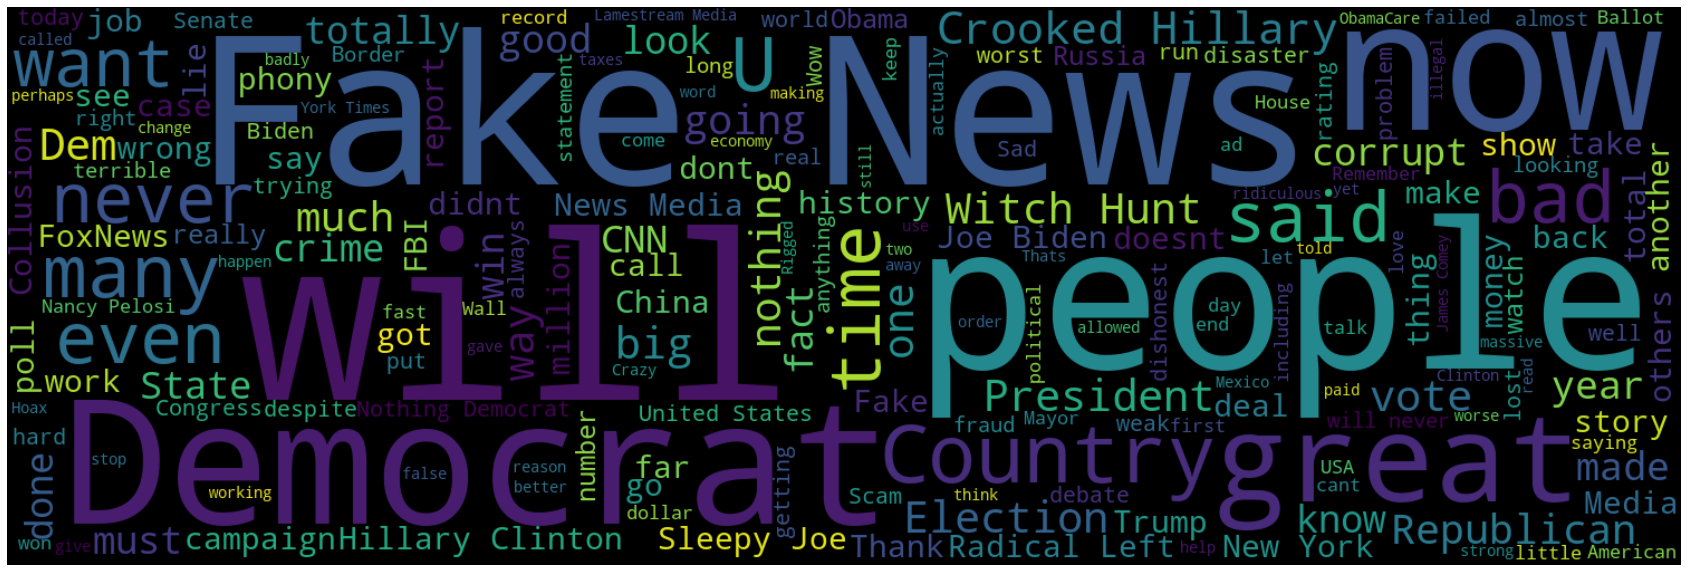

In [26]:
tweet_text = " ".join(text)

wordcloud = WordCloud(width=1500, height=500).generate(tweet_text)

plt.figure( figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
len(text)

2700

Tokenizing the data so for the model to understand

In [13]:
token=Tokenizer()


In [29]:
token.fit_on_texts(text)

In [130]:
token.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'is': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'for': 8,
 'that': 9,
 'i': 10,
 'are': 11,
 'they': 12,
 'on': 13,
 'it': 14,
 'will': 15,
 'he': 16,
 'have': 17,
 'was': 18,
 'with': 19,
 'be': 20,
 'not': 21,
 'fake': 22,
 'our': 23,
 'news': 24,
 'this': 25,
 'by': 26,
 'we': 27,
 'people': 28,
 'has': 29,
 'no': 30,
 'so': 31,
 'me': 32,
 'all': 33,
 'but': 34,
 'just': 35,
 'great': 36,
 'his': 37,
 'at': 38,
 'who': 39,
 'very': 40,
 'do': 41,
 'democrats': 42,
 'now': 43,
 'as': 44,
 'you': 45,
 'media': 46,
 'never': 47,
 'about': 48,
 'out': 49,
 'their': 50,
 'more': 51,
 'hillary': 52,
 'up': 53,
 'even': 54,
 'or': 55,
 'my': 56,
 'should': 57,
 'nothing': 58,
 'many': 59,
 'us': 60,
 'bad': 61,
 'than': 62,
 'been': 63,
 'country': 64,
 'what': 65,
 'would': 66,
 'president': 67,
 'from': 68,
 'she': 69,
 'want': 70,
 'joe': 71,
 'like': 72,
 'get': 73,
 'when': 74,
 'crooked': 75,
 'big': 76,
 'if': 77,
 'them': 78,
 'which': 79,
 'new': 80,
 'ele

In [30]:
len(token.word_index)

7124

In [31]:
enc_text=token.texts_to_sequences(text)

In [32]:
enc_text

[[3,
  446,
  278,
  2226,
  650,
  8,
  1887,
  302,
  2,
  1119,
  179,
  2780,
  195,
  8,
  30,
  429,
  1888,
  459],
 [100,
  96,
  682,
  416,
  52,
  118,
  77,
  16,
  205,
  416,
  387,
  497,
  13,
  1,
  2227,
  1202,
  19,
  3791,
  10,
  163,
  1,
  89,
  95,
  39,
  96],
 [531, 1036, 1203, 7, 13, 853, 228, 85, 29, 47, 63, 257, 72, 25, 7, 23, 64],
 [14,
  4,
  651,
  9,
  10,
  1889,
  67,
  5,
  1,
  201,
  132,
  19,
  254,
  6,
  108,
  113,
  2,
  171,
  268,
  46,
  98,
  127,
  32,
  33,
  261,
  2,
  33,
  235,
  1120,
  460,
  151,
  114,
  137,
  182,
  62,
  1,
  22,
  24,
  271,
  3,
  1121,
  55,
  12,
  86,
  17,
  1890,
  1,
  683,
  44,
  808,
  430],
 [33,
  121,
  133,
  854,
  476,
  18,
  3792,
  26,
  32,
  196,
  461,
  2228,
  8,
  23,
  64,
  28,
  17,
  2781,
  40,
  2782,
  498,
  404,
  14,
  4,
  338,
  1,
  356,
  197,
  148,
  7,
  1,
  112,
  5,
  23,
  64,
  388],
 [79,
  14,
  18,
  21,
  34,
  54,
  77,
  14,
  18,
  14,
  4,
  89,
  6,
  

In [33]:
vocab_size=len(token.word_counts) + 1

# Here basically we are converting the tokenized sentences into sentences containing of 2 or more words and the last word would be the target to the model 

In [34]:
input_sequences = []
for line in text:
    token_list = token.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [35]:
input_sequences

[[3, 446],
 [3, 446, 278],
 [3, 446, 278, 2226],
 [3, 446, 278, 2226, 650],
 [3, 446, 278, 2226, 650, 8],
 [3, 446, 278, 2226, 650, 8, 1887],
 [3, 446, 278, 2226, 650, 8, 1887, 302],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119, 179],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119, 179, 2780],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119, 179, 2780, 195],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119, 179, 2780, 195, 8],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119, 179, 2780, 195, 8, 30],
 [3, 446, 278, 2226, 650, 8, 1887, 302, 2, 1119, 179, 2780, 195, 8, 30, 429],
 [3,
  446,
  278,
  2226,
  650,
  8,
  1887,
  302,
  2,
  1119,
  179,
  2780,
  195,
  8,
  30,
  429,
  1888],
 [3,
  446,
  278,
  2226,
  650,
  8,
  1887,
  302,
  2,
  1119,
  179,
  2780,
  195,
  8,
  30,
  429,
  1888,
  459],
 [100, 96],
 [100, 96, 682],
 [100, 96, 682, 416],
 [100, 96, 682, 416, 52],
 [100

In [36]:
len(enc_text)

2700

In [37]:
len(input_sequences)

85062

In [38]:
r=[len(x) for x in input_sequences]

In [39]:
r=np.array(r)

In [40]:
max_len=np.max(r)

In [41]:
max_len

59

In [42]:
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_len,padding='pre'))

In [43]:
len(input_sequences)

85062

In [44]:
input_sequences

array([[   0,    0,    0, ...,    0,    3,  446],
       [   0,    0,    0, ...,    3,  446,  278],
       [   0,    0,    0, ...,  446,  278, 2226],
       ...,
       [   0,    0,    0, ...,   25,   33, 1259],
       [   0,    0,    0, ...,   33, 1259,  599],
       [   0,    0,    0, ..., 1259,  599, 1705]])

In [45]:
input_sequences.shape

(85062, 59)

In [46]:
x,y=input_sequences[:,:-1],input_sequences[:,-1]

In [47]:
x.shape,y.shape

((85062, 58), (85062,))

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# x,Xb,y,Yb=train_test_split(x,y,test_size=0.35,random_state=42,stratify=y)

In [50]:
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [51]:
x.shape

(85062, 58)

In [52]:
y.shape

(85062, 7125)

In [53]:
len(x[1]),max_len

(58, 59)

In [54]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## A basic LSTM based Model to generate text

In [74]:
model=Sequential()
model.add(Embedding(vocab_size,64,input_length=max_len-1))
model.add(Bidirectional(LSTM(256)))
# model.add(Dense(64, activation='relu'))
model.add(Dense(vocab_size,activation='softmax'))

In [75]:
# model.add(Dense(vocab_size,activation='softmax'))

In [76]:
# adam=Adam(lr=0.01)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
history=model.fit(x,y,epochs=100,verbose=1,batch_size=256,steps_per_epoch=(x.shape[0])//256)

Train on 85062 samples
Epoch 1/100
78406/85062 [==========================>...] - ETA: 2s - loss: 0.2821 - accuracy: 0.9499

KeyboardInterrupt: 

In [170]:
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [131]:
# history=model.fit(x,y,epochs=20,verbose=1,batch_size=256)

In [79]:
model.save('DonaldTrump_bestacc.h5')

In [112]:
seed_text = "Can you"
next_word=30

seed_text=seed_text.lower()
# seed_text=ven.remove_accented_chars(seed_text)
seed_text=ven.remove_special_chars(seed_text)

for _ in range(next_word):
    tok=token.texts_to_sequences([seed_text])[0]
    enc=pad_sequences([tok],maxlen=58,padding='pre')
    predicted = model.predict_classes(enc, verbose=0)
    output_word = ""
    for word, index in token.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

can you believe that the disrespect for our country our flag our anthem continues without penalty to the players the commissioner has lost control of the hemorrhaging league players are the boss


In [103]:
seed_text = "Russia"
next_word=30

# seed_text=seed_text.lower()
seed_text=ven.remove_accented_chars(seed_text)
seed_text=ven.remove_special_chars(seed_text)

for _ in range(next_word):
    tok=token.texts_to_sequences([seed_text])[0]
    enc=pad_sequences([tok],maxlen=58,padding='pre')
    predicted = model.predict_classes(enc, verbose=0)
    output_word = ""
    for word, index in token.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Russia and the do nothing democrats on their partner the fake news media are doing everything in the most negative so bad just looking look at whats a big con job


In [111]:
df['tweet'][0]

'Can you believe this fool, Dr. Thomas Frieden of CDC, just stated, "anyone with fever should be asked if they have been in West Africa" DOPE'

In [16]:
mo=tf.keras.models.load_model('DonaldTrump_bestacc.h5')

In [147]:
mo=tf.keras.models.load_model('DonaldTrump_1.2')

In [151]:
seed_text = "obama"
next_word=35

seed_text=seed_text.lower()
seed_text=ven.remove_accented_chars(seed_text)
seed_text=ven.remove_special_chars(seed_text)

for _ in range(next_word):
    tok=token.texts_to_sequences([seed_text])[0]
    enc=pad_sequences([tok],maxlen=58,padding='pre')
    predicted = model.predict_classes(enc, verbose=0)
    output_word = ""
    for word, index in token.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

obama and all others have been so weak and so politically correct that terror groups are forming and getting stronger shame in ps their way i do not not even we can do it will happen


In [4]:
import pickle

In [122]:
tokwordind=token.word_index

In [123]:
pickle_out = open("tokwordind.pkl","wb")
pickle.dump(tokwordind, pickle_out)
pickle_out.close()

In [124]:
tokwordind

{'the': 1,
 'and': 2,
 'to': 3,
 'is': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'for': 8,
 'that': 9,
 'i': 10,
 'are': 11,
 'they': 12,
 'on': 13,
 'it': 14,
 'will': 15,
 'he': 16,
 'have': 17,
 'was': 18,
 'with': 19,
 'be': 20,
 'not': 21,
 'fake': 22,
 'our': 23,
 'news': 24,
 'this': 25,
 'by': 26,
 'we': 27,
 'people': 28,
 'has': 29,
 'no': 30,
 'so': 31,
 'me': 32,
 'all': 33,
 'but': 34,
 'just': 35,
 'great': 36,
 'his': 37,
 'at': 38,
 'who': 39,
 'very': 40,
 'do': 41,
 'democrats': 42,
 'now': 43,
 'as': 44,
 'you': 45,
 'media': 46,
 'never': 47,
 'about': 48,
 'out': 49,
 'their': 50,
 'more': 51,
 'hillary': 52,
 'up': 53,
 'even': 54,
 'or': 55,
 'my': 56,
 'should': 57,
 'nothing': 58,
 'many': 59,
 'us': 60,
 'bad': 61,
 'than': 62,
 'been': 63,
 'country': 64,
 'what': 65,
 'would': 66,
 'president': 67,
 'from': 68,
 'she': 69,
 'want': 70,
 'joe': 71,
 'like': 72,
 'get': 73,
 'when': 74,
 'crooked': 75,
 'big': 76,
 'if': 77,
 'them': 78,
 'which': 79,
 'new': 80,
 'ele

In [8]:
tokw=pickle.load(open("tokwordind.pkl","rb"))

In [9]:
tokw

{'the': 1,
 'and': 2,
 'to': 3,
 'is': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'for': 8,
 'that': 9,
 'i': 10,
 'are': 11,
 'they': 12,
 'on': 13,
 'it': 14,
 'will': 15,
 'he': 16,
 'have': 17,
 'was': 18,
 'with': 19,
 'be': 20,
 'not': 21,
 'fake': 22,
 'our': 23,
 'news': 24,
 'this': 25,
 'by': 26,
 'we': 27,
 'people': 28,
 'has': 29,
 'no': 30,
 'so': 31,
 'me': 32,
 'all': 33,
 'but': 34,
 'just': 35,
 'great': 36,
 'his': 37,
 'at': 38,
 'who': 39,
 'very': 40,
 'do': 41,
 'democrats': 42,
 'now': 43,
 'as': 44,
 'you': 45,
 'media': 46,
 'never': 47,
 'about': 48,
 'out': 49,
 'their': 50,
 'more': 51,
 'hillary': 52,
 'up': 53,
 'even': 54,
 'or': 55,
 'my': 56,
 'should': 57,
 'nothing': 58,
 'many': 59,
 'us': 60,
 'bad': 61,
 'than': 62,
 'been': 63,
 'country': 64,
 'what': 65,
 'would': 66,
 'president': 67,
 'from': 68,
 'she': 69,
 'want': 70,
 'joe': 71,
 'like': 72,
 'get': 73,
 'when': 74,
 'crooked': 75,
 'big': 76,
 'if': 77,
 'them': 78,
 'which': 79,
 'new': 80,
 'ele

In [156]:
seed_text = "I am"
next_word=30

seed_text=seed_text.lower()
seed_text=ven.remove_accented_chars(seed_text)
seed_text=ven.remove_special_chars(seed_text)

for _ in range(next_word):
    tok=token.texts_to_sequences([seed_text])[0]
    enc=pad_sequences([tok],maxlen=58,padding='pre')
    predicted = model.predict_classes(enc, verbose=0)
    output_word = ""
    for word, index in tokw.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

i am in the process of interviewing some really great people for the position of white house chief of staff fake news has been saying with certainty it was nick ayers a
